# TB231c - abm model 1 - simple economy - Part 1
This is a model of a very simplistic economy. Code is based on the mesa tutorial model found here : https://mesa.readthedocs.io/en/stable/tutorials/intro_tutorial.html

Goal of these exercises is :
* make sure your programming environment works
* get reacquainted with python, mesa etc.
  * basic structure of a mesa model
  * basic use of the DataCollector
* learn how to make basic visualizations and animations from model data
* understand the difference between agent and model level properties

In [46]:
#library imports:
import mesa
from mesa import Agent, Model
from mesa.datacollection import DataCollector
#load all available schedulers
import mesa.time as time

# matplot lib for plotting, numpy for all sorts of useful math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# For a jupyter notebook we have to tell matplotlib to draw graphs inline
%matplotlib inline

#basic python statistics
import statistics as stat

#import pandas
import pandas as pd

# Required libraries for animation
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc, collections
from IPython.display import HTML

# Some basic python and jupyter points to note!
_Look these things up on the internet!_
* Cell types (markdown/raw/code)
* statefulness of a jupyter session
  * _Look up what is statefulness!_
  * restart and run-all shortcut: https://medium.com/@tairanye/how-to-create-a-shortcut-for-restart-and-run-all-in-jupyterlab-5c5aa4d8839a
  * Turning cells on / off : https://stackoverflow.com/questions/34192290/ipython-notebook-elegant-way-of-turning-off-part-of-cells
  
* dark mode is available if you prefer
* useful keyboard shortcuts
  * Split cell
  * Merge cells
* contextual help with ctrl-I
* Turn on line numbers in Jupyter :  Shift-L or alternatively you can go to View–> Toggle Line Number
  * How to do it permanently : https://www.roelpeters.be/enable-row-numbers-in-jupyter-notebooks/

In [47]:
# the model :

class MoneyAgent(Agent):
    """ An agent with fixed initial wealth."""
    def __init__(self, unique_id, model, max_init_money , max_take_money):
        super().__init__(unique_id, model)
        self.wealth = self.random.randrange(max_init_money) #starts with a random amount of money
        self.max_take_money = max_take_money #amount of money they can maximally take

    def step(self): #actions the agent takes
 
        other_agent = self.random.choice(self.model.schedule.agents) #take a random other agent
        money_to_take = self.random.randrange(self.max_take_money) #select the amount of money to take from other agent
        
        
        #we can not take more than the other agent has
        #so, determine how much the other has, if we are taking less than what they have , take it
        # if not, take all they got, untill they have 0
        
        available_to_take = other_agent.wealth #what amount of money does the other agent have?
        
        if available_to_take >= money_to_take: #if the money available is more than the money we want to take 
            other_agent.wealth -= money_to_take #reduce the wealth of the other agent by the money we want to take
            #other_agent.wealth = other_agent.wealth - money_to_take
            self.wealth += money_to_take #we get richer
        else:
            #take all they have
            self.wealth += other_agent.wealth
            other_agent.wealth = 0
        

class MoneyModel(Model): 
    """A model with some number of agents."""
    def __init__(self, N, max_init_money = 100, max_take_money = 10):
        self.num_agents = N
        self.schedule = time.RandomActivation(self)
        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self, max_init_money, max_take_money )
            self.schedule.add(a)

    def step(self):
        '''Advance the model by one step.'''
        self.schedule.step()

In [48]:
#running the model
model = MoneyModel(1000) #number of agents 

In [49]:
for i in range(1000):
    model.step() #calling the step model to advance the model.

In [50]:
# Lets collect some data about the model, now that we finished running it.
agent_wealth = [a.wealth for a in model.schedule.agents]

In [51]:
print(agent_wealth)

[220, 25, 12, 6, 38, 65, 50, 81, 52, 32, 35, 0, 19, 42, 36, 265, 12, 63, 30, 10, 219, 8, 113, 68, 8, 80, 14, 2, 38, 11, 26, 11, 22, 17, 106, 317, 1, 45, 50, 137, 124, 0, 7, 57, 35, 8, 13, 87, 171, 69, 6, 25, 0, 28, 61, 36, 12, 106, 109, 29, 34, 0, 77, 26, 47, 59, 171, 64, 9, 6, 143, 126, 108, 48, 2, 73, 50, 1, 45, 1, 77, 55, 30, 2, 15, 28, 19, 18, 88, 149, 0, 165, 5, 45, 107, 14, 20, 13, 38, 0, 28, 14, 7, 71, 70, 89, 20, 42, 52, 22, 57, 41, 40, 9, 103, 32, 75, 76, 0, 74, 3, 103, 67, 48, 12, 91, 68, 141, 44, 109, 14, 3, 18, 9, 60, 22, 10, 63, 16, 69, 9, 60, 70, 21, 232, 2, 38, 49, 80, 38, 12, 7, 3, 16, 16, 36, 122, 9, 60, 55, 30, 40, 81, 44, 1, 40, 86, 38, 114, 164, 63, 71, 4, 21, 62, 45, 5, 44, 170, 9, 12, 8, 207, 17, 9, 53, 11, 26, 64, 127, 18, 68, 104, 48, 106, 2, 56, 57, 80, 3, 19, 20, 46, 75, 17, 38, 30, 16, 27, 66, 0, 32, 12, 97, 96, 90, 60, 105, 100, 262, 63, 80, 35, 27, 70, 67, 17, 23, 28, 58, 225, 0, 58, 2, 196, 46, 41, 47, 8, 35, 11, 24, 67, 14, 80, 6, 11, 58, 91, 60, 21, 11, 

# Part 1 - System level properties

Determine the :
* maximum
* minimum
* mean
* median
* mode

of the agent population. What do you notice ?

Now create a histogram of the money agents heave. WHat do you notice ?

_hint: you can use the  statistics library_

In [52]:
# Solution
print("Minimum money of the population = " + str(min(agent_wealth)))
print("Maximum money of the population = " + str(max(agent_wealth)))
print("Mean money of the population = " + str( stat.fmean(agent_wealth)))
print("Median money of the population = " + str( stat.median(agent_wealth)))
print("Modal money of the population = " + str(stat.mode(agent_wealth)))

Minimum money of the population = 0
Maximum money of the population = 317
Mean money of the population = 50.449
Median money of the population = 38.0
Modal money of the population = 0


<Axes: ylabel='Count'>

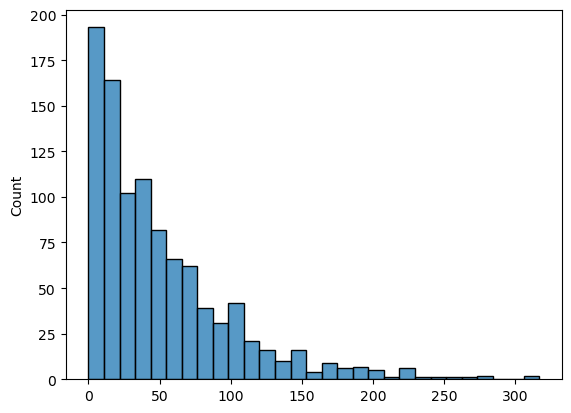

In [53]:
sns.histplot(agent_wealth) #lot of poor agents and a few rich agents

# Effect of simulation time on the end state
Depending on how long we run the simulation, our end state will be different.

In this step, check the state of the simulation at 0,2,5,10,100,500 steps, using a histogram.

What do you notice ?

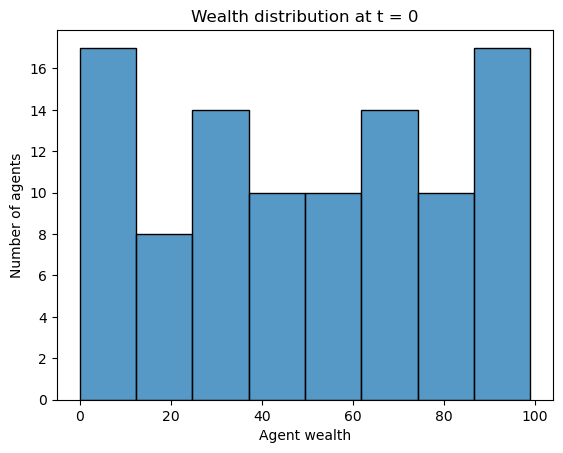

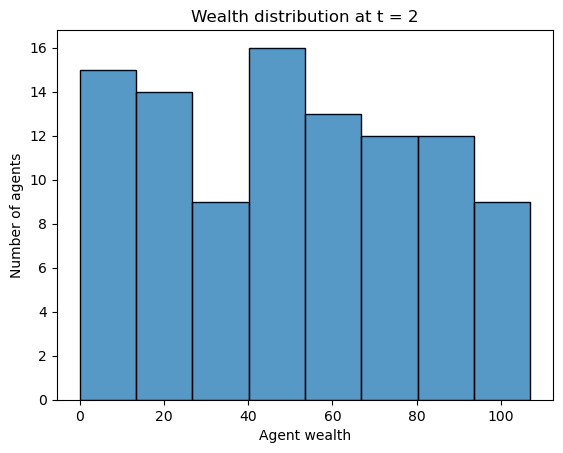

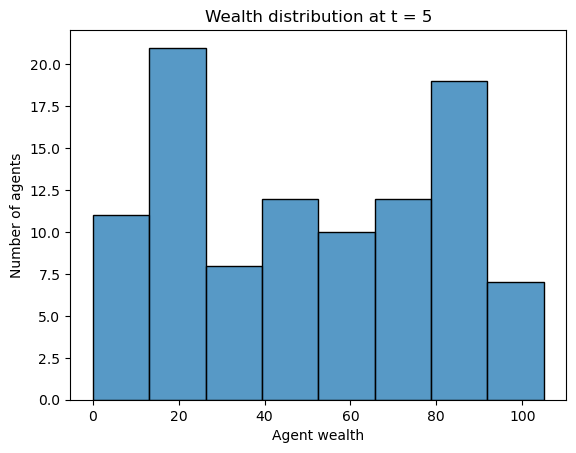

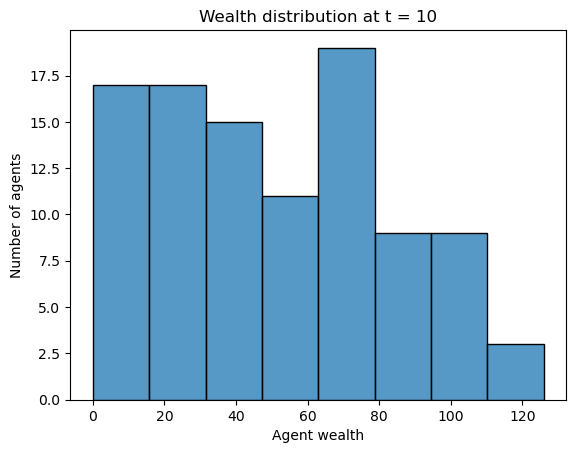

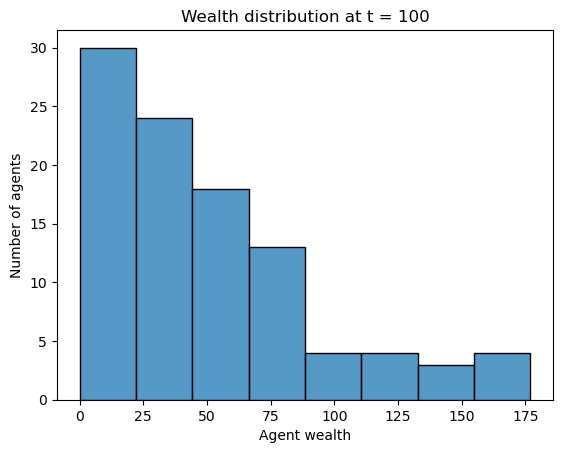

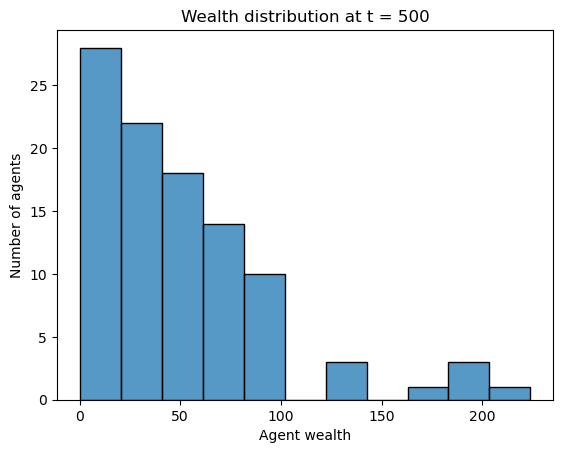

In [54]:
# Solution

#initialize a new model, as the previous instance is at step 1000
model = MoneyModel(100)

# Timesteps to  collect the data about the model.
steps_to_measure = [0,2,5,10,100,500]

for i in range(501):
    if i in steps_to_measure:
        agent_wealth = [a.wealth for a in model.schedule.agents]
        plt.figure()
        sns.histplot(agent_wealth)
        plt.title("Wealth distribution at t = " + str(model.schedule.steps))
        plt.xlabel("Agent wealth")
        plt.ylabel("Number of agents")
    model.step()


# We notice that the distribution become more unequal over time.

# System level properties over time
Next to studying the emergent pattern / structure at the end of the simulation run, or at specific timesteps, we often want to udnerstand how the entire system behaves

Lets create a movie of the wealth histogram over entire simulation run of 300 steps.

RuntimeError: Requested MovieWriter (ffmpeg) not available

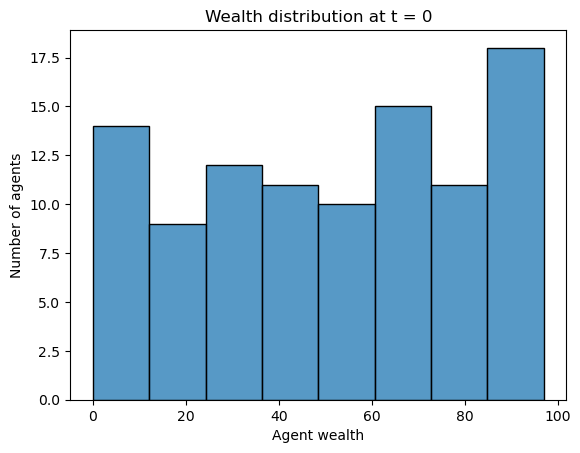

In [55]:
# here we will be using as matplotlib function called FuncAnimation : https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.FuncAnimation.html
# It will repeatedly call the update function on the figure object we have given it.
# We are using it in a similar way we used our for loop in the previous step.


#initialize a new model
model = MoneyModel(100)
#get the initial stats.
agent_wealth = [a.wealth for a in model.schedule.agents]

#create a figure to draw on.
fig = plt.figure()


#The update function. What has to happen every time we take a step
def update(frame):
    # clear the previous image, since plt.hist() function does not have an update method, like some others
    plt.cla() 
    
    #compute the statistics
    agent_wealth = [a.wealth for a in model.schedule.agents]
    
    #make the plot,
    sns.histplot(agent_wealth)
    
    #make it pretty
    plt.title("Wealth distribution at t = " + str(model.schedule.steps))
    plt.xlabel("Agent wealth")
    plt.ylabel("Number of agents")
    
    
    #step the model. We are stepping the model only after we have done the plot, so that we can capture step 0
    model.step()
    

    #the actual animation function.
anim = FuncAnimation(fig, update, interval = 100, frames=300)

HTML(anim.to_html5_video())

In [ ]:
##Use this to save the visualization into an mp4 movie
#writervideo = animation.FFMpegWriter(fps=12,bitrate=900) 
#anim.save("economy.mp4", writer=writervideo,dpi=200)

RuntimeError: Requested MovieWriter (ffmpeg) not available

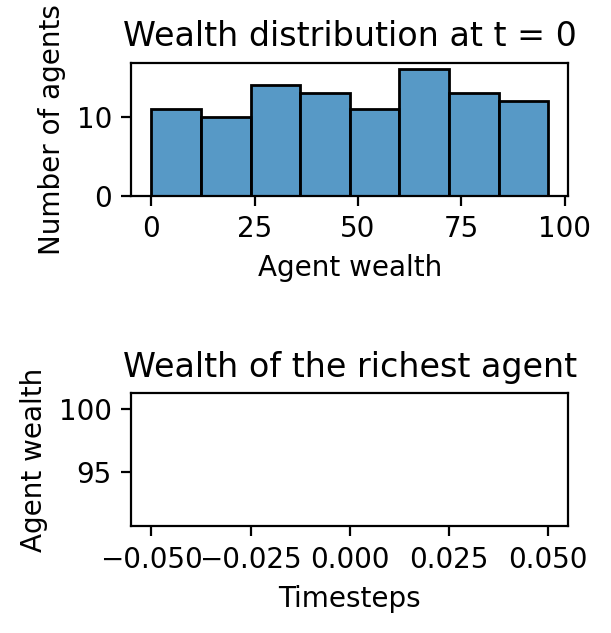

In [ ]:
# Now add a second plot to the movie, plotting the wealth of the richest agent


#initialize a new model
model = MoneyModel(100)
#get the initial stats.
agent_wealth = [a.wealth for a in model.schedule.agents]
#make alist of wealth
richest_agent_wealth = [max(agent_wealth)]
steps = [model.schedule.steps]


#create a figure to draw on, with 2 subplots, and give them a size of 6x6 inches
fig, (ax1, ax2) = plt.subplots(2,figsize=(4,4),dpi=200)
#add some padding between the subplots to make it pretty
fig.tight_layout(pad=5.0)



#cereate an empty plot
sns.lineplot(x=steps,y=richest_agent_wealth, ax=ax2)


#The update function. What has to happen every time we take a step
def update(frame):
    # clear the previous image, by resetting the axes on which we have drawn
    ax1.cla() 
    ax2.cla()
    #compute the statistics for each agent
    agent_wealth = [a.wealth for a in model.schedule.agents]
    #add the current richtest agent and the time step to the relevant lists
    richest_agent_wealth.append(max(agent_wealth))
    steps.append(model.schedule.steps)
    
    #make the plot
    sns.histplot(agent_wealth, ax = ax1)
    ax1.title.set_text("Wealth distribution at t = " + str(model.schedule.steps))
    ax1.set_xlabel("Agent wealth")
    ax1.set_ylabel("Number of agents")
    
    ax2.title.set_text("Wealth of the richest agent")
    ax2.set_xlabel("Timesteps")
    ax2.set_ylabel("Agent wealth")
    sns.lineplot(x=steps, y=richest_agent_wealth)
    
    
    #step the model. We are stepping the model only after we have done the plot, so that we can capture step 0
    model.step()
    

    #the actual animation function.
anim = FuncAnimation(fig, update, interval = 100, frames=30)

HTML(anim.to_html5_video())

In [ ]:
#Use this to save the visualisation into a mp4 movie

#writervideo = animation.FFMpegWriter(fps=24,bitrate=900) 
#anim.save("economy.mp4", writer=writervideo,dpi=300)

# Part 2 -  Individual properties over time

The previous approach works fine, as long as you know what you want to plot in advance, and running  the model is quick. However, then the simulation takes a long time, and you want to decide later what the relevant plots are, we need to collect simulation data in a more systematic way.

Mesa has a way to do that with the DataCollector class.

We will change the agent and model definition here, overwriting the one defined int he beginning

In [ ]:
# Define the data collection functions, that will be used by the DataCollector :

def get_agents_wealth(model):
    """Returns a list with wealth values for all agents """
    return [a.wealth for a in model.schedule.agents]


def get_wealth_and_id_richest(model):
    """Returns the identify and wealth the richest agent as a two element tuple"""
    richest_agent = None
    max_wealth = -1

    for a in model.schedule.agents:
        if a.wealth > max_wealth:
            richest_agent = a
            max_wealth = a.wealth
    return richest_agent.unique_id,max_wealth

def max_wealth(model):
    return get_wealth_and_id_richest(model)[1]

def richest(model):
        return get_wealth_and_id_richest(model)[0]

def get_step_number(model):
        return model.schedule.steps

In order to use these functions, we must define the DataCollector in the model.

In [ ]:
# the model with data collector

class MoneyAgent(Agent):
    """ An agent with fixed initial wealth."""
    def __init__(self, unique_id, model, max_init_money , max_take_money):
        super().__init__(unique_id, model)
        self.wealth = self.random.randrange(max_init_money)
        self.max_take_money = max_take_money
      
    def step(self):
 
        other_agent = self.random.choice(self.model.schedule.agents)
        money_to_take = self.random.randrange(self.max_take_money)
        
        #we can not take more than the other agent has
        #so, determine how much the other has, if we are taking less than what they have, take it
        # if not, take all they got, untill they have 0
        
        available_to_take = other_agent.wealth
        
        if available_to_take >= money_to_take:
            other_agent.wealth -= money_to_take
            self.wealth += money_to_take
        else:
            #take all they have
            self.wealth += other_agent.wealth
            other_agent.wealth = 0
      
class MoneyModel(Model):
    """A model with some number of agents."""
    def __init__(self, N, max_init_money = 100, max_take_money = 10,seed=None):
        self.num_agents = N
        self.schedule = time.RandomActivation(self)
        
        #the data collector, defines which variables will eb collected, and how
        model_metrics = {
                "step":get_step_number,
                "agent_wealth":get_agents_wealth,
                "max_wealth":max_wealth,
                "richest_agent":richest,
            }
        agent_metrics = {
            "wealth":"wealth"
        }
        self.datacollector = DataCollector(model_reporters=model_metrics,agent_reporters=agent_metrics)
    
        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self, max_init_money, max_take_money )
            self.schedule.add(a)

    def step(self):
        '''Advance the model by one step.'''  
        #collect the model data 
        self.datacollector.collect(self)
        #run the step
        self.schedule.step()


In [ ]:
#run the model

model = MoneyModel(100)

for i in range(100):
    model.step()

In [ ]:
#Get the Pandas Dataframe from the model, by using the table name we defined in the model
model_data = model.datacollector.get_model_vars_dataframe()
agent_data = model.datacollector.get_agent_vars_dataframe()

In [ ]:
model_data.head()

,step,agent_wealth,max_wealth,richest_agent
0,0,"[42, 64, 42, 32, 37, 1, 19, 24, 13, 79, 94, 42...",99,71
1,1,"[37, 52, 32, 26, 40, 0, 20, 19, 18, 78, 101, 4...",106,71
2,2,"[35, 55, 30, 34, 36, 6, 27, 0, 1, 64, 104, 40,...",106,71
3,3,"[39, 51, 32, 32, 37, 10, 22, 0, 8, 68, 97, 32,...",110,71
4,4,"[41, 59, 37, 38, 38, 6, 25, 0, 8, 69, 103, 26,...",113,37


In [ ]:
model_data.tail()

,step,agent_wealth,max_wealth,richest_agent
95,95,"[65, 36, 31, 113, 0, 18, 61, 7, 68, 37, 70, 14...",207,42
96,96,"[59, 42, 22, 114, 8, 14, 67, 4, 70, 45, 79, 15...",204,42
97,97,"[53, 46, 18, 118, 8, 9, 72, 0, 68, 47, 73, 148...",193,42
98,98,"[46, 46, 15, 111, 8, 11, 72, 0, 72, 56, 75, 15...",197,42
99,99,"[36, 48, 15, 113, 13, 6, 76, 0, 76, 62, 75, 15...",200,42


In [ ]:
agent_data.head()

wealth
Step AgentID        
0    0            71
     1            23
     2            44
     3            85
     4            58

In [ ]:
agent_data.tail()

wealth
Step AgentID        
99   95           58
     96           94
     97           77
     98          119
     99           26

Now lets see what is each agents wealth over time

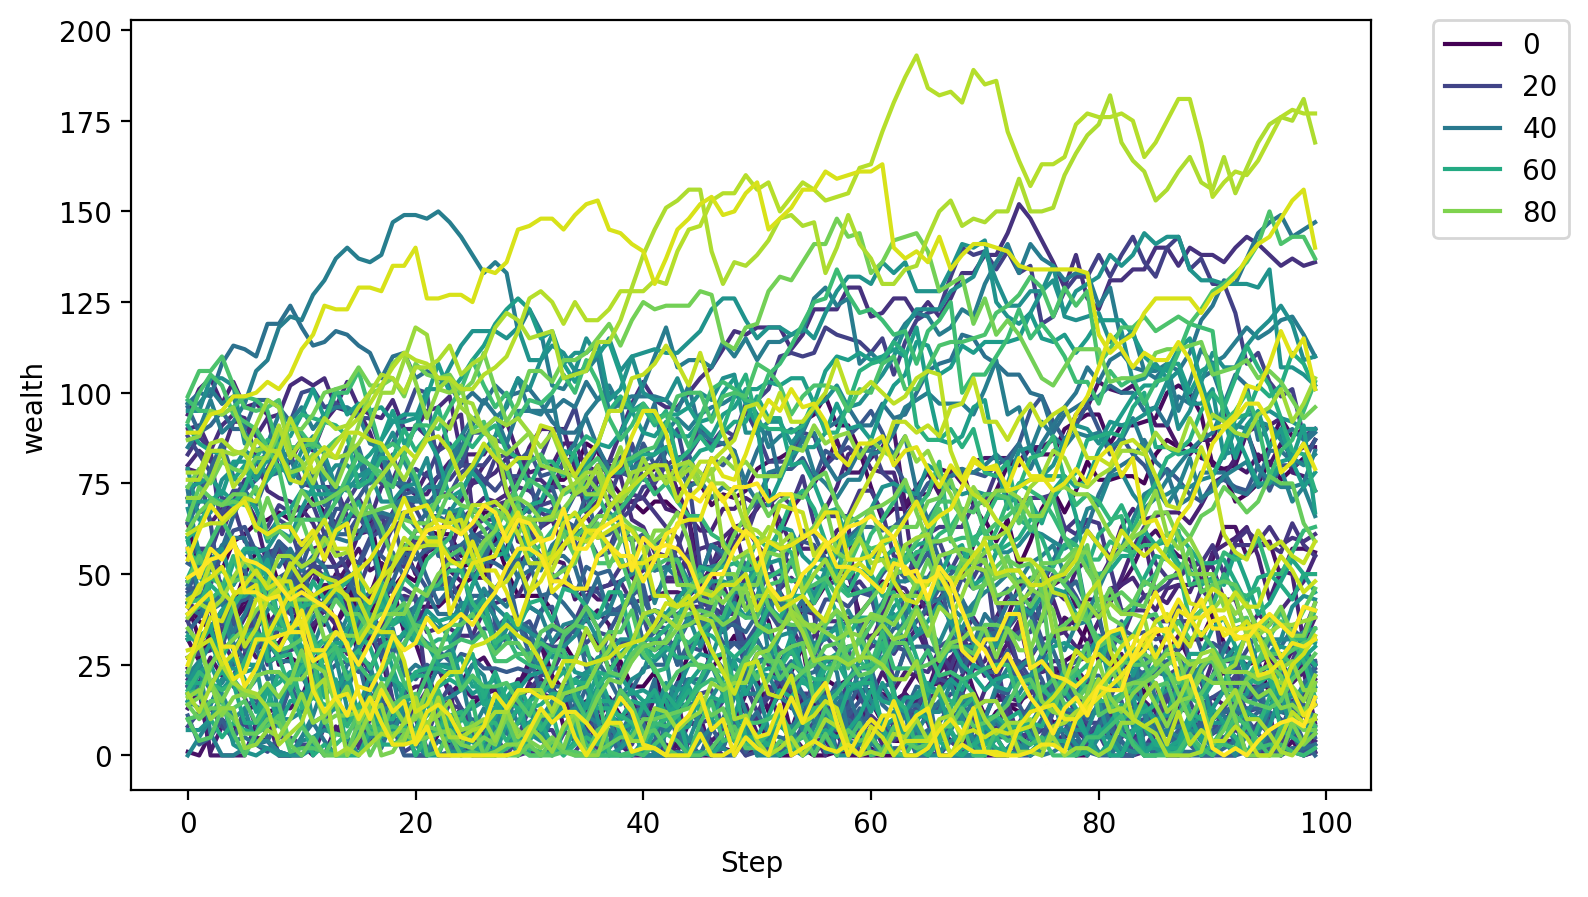

In [ ]:
fig, ax = plt.subplots(figsize=(8,5), dpi=200)
sns.lineplot(data = agent_data,  x='Step',y='wealth', hue='AgentID',palette='viridis', ax=ax)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

Text(0.5, 1.0, 'Wealth of the richest agent over time')

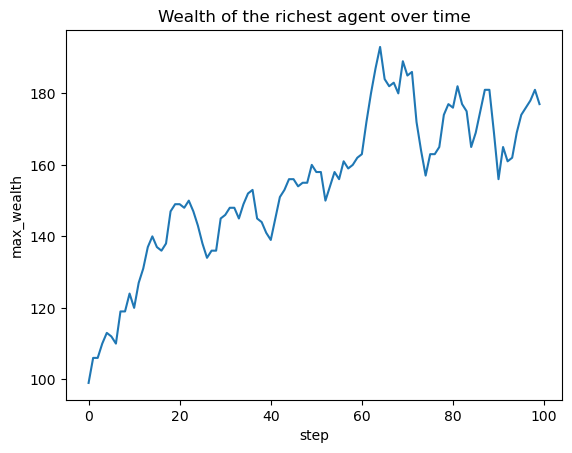

In [ ]:
#Plot the wealth of the richest agent over time
sns.lineplot(data=model_data, x='step',y='max_wealth')
plt.title('Wealth of the richest agent over time')

# Excercise
Make a plot in which you show the average agent wealth and the standard deviation of agent wealth over time?

_Hint: the agent_data is a MultiIndex data frame and seaborn has boxplot feature_

/var/folders/_k/3g8dn1nx16scj_7b_nws5kh40000gn/T/ipykernel_23658/276337981.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data = avarage_overtime, palette='viridis', ax=ax)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


{0: 47.98, 1: 47.98, 2: 47.98, 3: 47.98, 4: 47.98, 5: 47.98, 6: 47.98, 7: 47.98, 8: 47.98, 9: 47.98, 10: 47.98, 11: 47.98, 12: 47.98, 13: 47.98, 14: 47.98, 15: 47.98, 16: 47.98, 17: 47.98, 18: 47.98, 19: 47.98, 20: 47.98, 21: 47.98, 22: 47.98, 23: 47.98, 24: 47.98, 25: 47.98, 26: 47.98, 27: 47.98, 28: 47.98, 29: 47.98, 30: 47.98, 31: 47.98, 32: 47.98, 33: 47.98, 34: 47.98, 35: 47.98, 36: 47.98, 37: 47.98, 38: 47.98, 39: 47.98, 40: 47.98, 41: 47.98, 42: 47.98, 43: 47.98, 44: 47.98, 45: 47.98, 46: 47.98, 47: 47.98, 48: 47.98, 49: 47.98, 50: 47.98, 51: 47.98, 52: 47.98, 53: 47.98, 54: 47.98, 55: 47.98, 56: 47.98, 57: 47.98, 58: 47.98, 59: 47.98, 60: 47.98, 61: 47.98, 62: 47.98, 63: 47.97, 64: 47.97, 65: 47.97, 66: 47.97, 67: 47.92, 68: 47.92, 69: 47.92, 70: 47.92, 71: 47.92, 72: 47.92, 73: 47.92, 74: 47.92, 75: 47.92, 76: 47.92, 77: 47.92, 78: 47.92, 79: 47.89, 80: 47.89, 81: 47.89, 82: 47.89, 83: 47.89, 84: 47.89, 85: 47.89, 86: 47.89, 87: 47.89, 88: 47.89, 89: 47.89, 90: 47.89, 91: 47.8

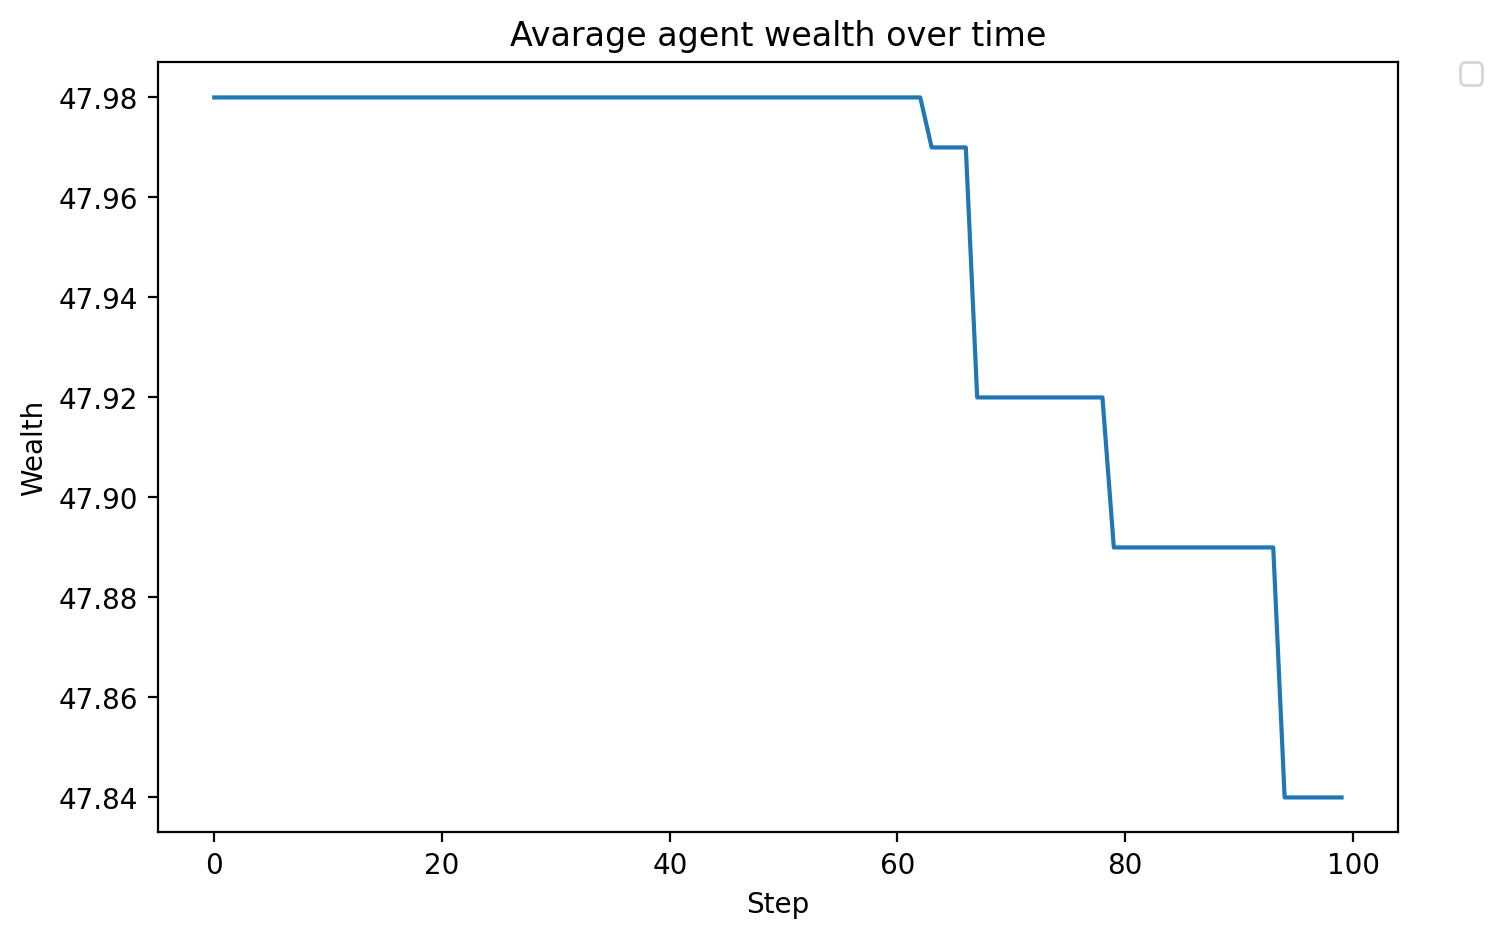

In [74]:
agent_wealth_delta = model_data['agent_wealth']
avarage_overtime = {}
standard_dev_overtime = {}

for i, j in enumerate(agent_wealth_delta):
    avarage = sum(j)/len(j)
    std = np.std(j)
    avarage_overtime[i] = avarage
    standard_dev_overtime[i] = std

print(avarage_overtime)




fig, ax = plt.subplots(figsize=(8,5), dpi=200)
sns.lineplot(data = avarage_overtime, palette='viridis', ax=ax)
ax.set_title("Avarage agent wealth over time")
ax.set_xlabel("Step")
ax.set_ylabel("Wealth")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


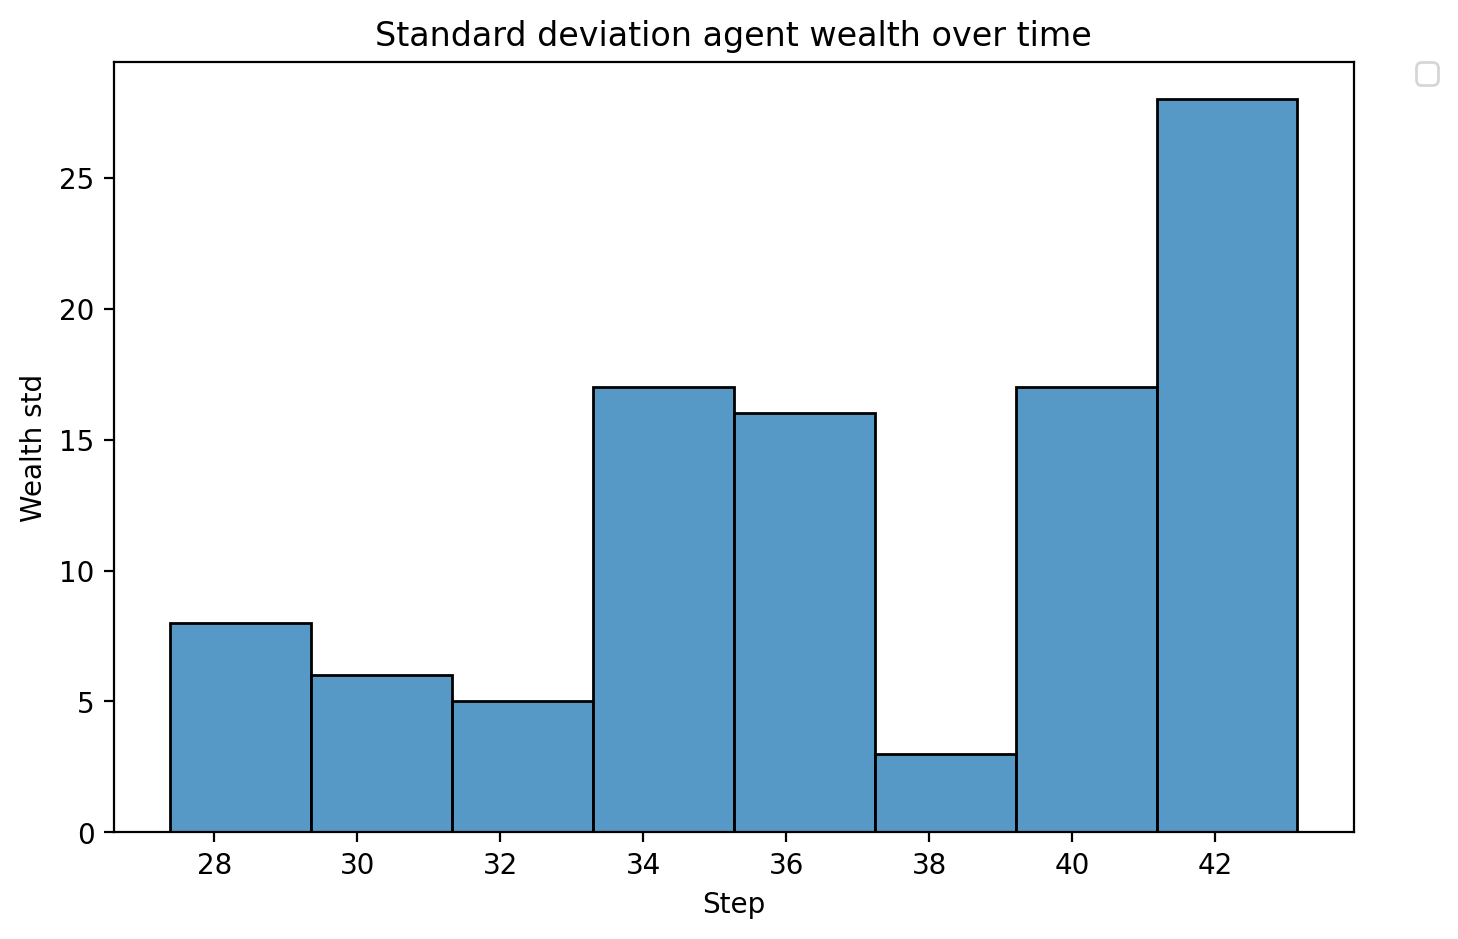

In [80]:
fig, ax = plt.subplots(figsize=(8,5), dpi=200)
sns.histplot(data = standard_dev_overtime, ax=ax)
ax.set_title("Standard deviation agent wealth over time")
ax.set_xlabel("Step")
ax.set_ylabel("Wealth std")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)